### About Dataset

* Age- Age Of The Customer
* Employment Type- The Sector In Which Customer Is Employed
* GraduateOrNot- Whether The Customer Is College Graduate Or Not
* AnnualIncome- The Yearly Income Of The Customer In Indian Rupees[Rounded To Nearest 50 Thousand Rupees]
* FamilyMembers- Number Of Members In Customer's Family
* ChronicDisease- Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.
* FrequentFlyer- Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 * Years[2017-2019].
* EverTravelledAbroad- Has The Customer Ever Travelled To A Foreign Country[Not Necessarily Using The Company's Services]
* TravelInsurance- Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

### Import Libraries 

In [463]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

### Load Data

In [464]:
df = pd.read_csv('TravelInsurancePrediction.csv')
df

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


Observasi:

1. Semua kolom, kecuali `Employment Type` adalah numeric
2. Kolom `GraduateOrNot`, `FrequentFlyer`, dan `EverTravelledAbroad` tampaknya mengandung dua nilai yang berbeda (ya ATAU tidak), tetapi akan dikonfirmasi nanti
3. `ChronicDiseases` dan `TravelInsurance` adalah biner (0,1)
4. `Unnamed: 0` hanyalah indeks untuk kolom. Drop kolom tersebut

In [465]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


### General Information & Missing Values

In [466]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [467]:
df.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [468]:
df.isna().sum() * 100 / len(df)

Age                    0.0
Employment Type        0.0
GraduateOrNot          0.0
AnnualIncome           0.0
FamilyMembers          0.0
ChronicDiseases        0.0
FrequentFlyer          0.0
EverTravelledAbroad    0.0
TravelInsurance        0.0
dtype: float64

Tidak ada missing values

### Duplicated data check 

In [469]:
# number of duplicated data
df.duplicated().sum()

738

In [470]:
# optional
# sample duplicated rows
df[df.duplicated(keep=False)].sort_values('Age')

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
570,25,Private Sector/Self Employed,No,1150000,5,1,No,No,0
298,25,Private Sector/Self Employed,No,1700000,4,0,Yes,No,1
899,25,Private Sector/Self Employed,Yes,1700000,3,0,Yes,No,1
1431,25,Private Sector/Self Employed,No,1150000,6,0,No,No,1
1427,25,Private Sector/Self Employed,No,1150000,6,0,No,No,1
...,...,...,...,...,...,...,...,...,...
598,35,Private Sector/Self Employed,No,800000,6,0,Yes,No,1
1184,35,Private Sector/Self Employed,No,800000,4,0,No,No,0
588,35,Private Sector/Self Employed,No,800000,6,0,No,No,1
139,35,Private Sector/Self Employed,No,800000,7,1,No,No,1


In [471]:
# drop duplicated rows
df = df.drop_duplicates()

In [472]:
# sanity check
df.duplicated().sum()

0

Tidak ada duplikat data

### Data understanding

#### Statistical summary

In [473]:
#numericals columns
num_col = list(df._get_numeric_data().columns)
print(num_col)

['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'TravelInsurance']


In [474]:
#categoricals columns
cat_col = [i for i in df.columns if i not in num_col]
print(cat_col)

['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']


In [475]:
# numerical statistical sumary
df[num_col].describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1249.000000,1.249000e+03,1249.000000,1249.000000,1249.000000
mean,29.755805,9.345476e+05,4.890312,0.333066,0.386709
std,2.921039,3.607293e+05,1.762313,0.471499,0.487191
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.200000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


Observasi:

* Secara keseluruhan, nilai minimum dan maksimum masuk akal untuk setiap kolom
* `ChronicDiseases` dan `TravelInsurance` adalah kolom boolean/biner karena nilainya 0 atau 1, tidak perlu disimpulkan simetrinya. Karena ini dapat menjadi variabel target untuk pemodelan, nanti akan diperiksa balance-level
* Mean ~ 50% (Median) pada kolom `Age`, `AnnualIncome`, dan `FamilyMembers`, menunjukan symmetrical distribution

In [477]:
# describe method on categorical data
df[cat_col].describe()

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
count,1249,1249,1249,1249
unique,2,2,2,2
top,Private Sector/Self Employed,Yes,No,No
freq,876,1047,954,1005


In [478]:
for col in cat_col:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of Employment Type column
Private Sector/Self Employed    876
Government Sector               373
Name: Employment Type, dtype: int64 

Value counts of GraduateOrNot column
Yes    1047
No      202
Name: GraduateOrNot, dtype: int64 

Value counts of FrequentFlyer column
No     954
Yes    295
Name: FrequentFlyer, dtype: int64 

Value counts of EverTravelledAbroad column
No     1005
Yes     244
Name: EverTravelledAbroad, dtype: int64 



Observasi:

1. `Employment Type` memiliki 2 unique value, 'Government Sector' dan 'Private Sector/Self Employed'
2. `GraduateOrNot`, `FrequentFlyer`, dan `EverTravelledAbroad` memiliki 2 unique value, 'yes' dan 'no'
3. Pelanggan terbanyak Private Sector/Self Employed (876 rows), dan sisanya Government Sector
4. Pelanggan terbanyak graduate (1047 rows), dan sisanya no graduate
5. Pelanggan terbanyak yang tidak memiliki FrequentFlyer (954 lines), dan sisanya memiliki FrequentFlyer
6. Pelanggan terbanyak yang tidak EverTravelledAbroad (1005 lines), dan sisanya EverTravelledAbroad

### Univariate Analysis

#### Boxplot to detect outliers 

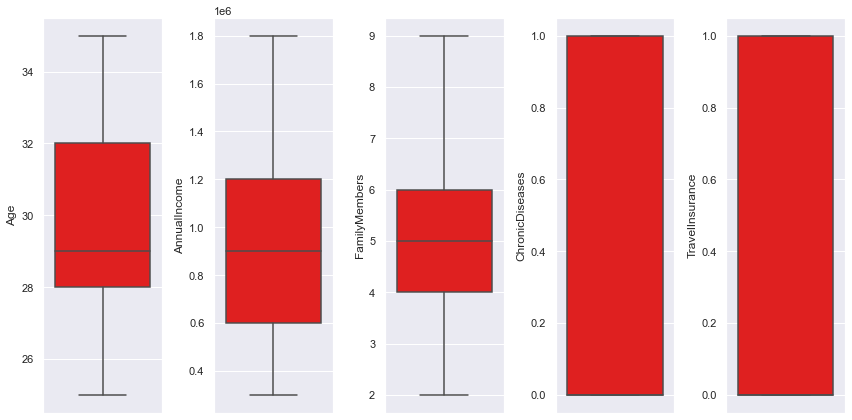

In [479]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = num_col
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='red')
    plt.tight_layout()

Tidak ada outliers

### KDE plot for knowing the distribution form 

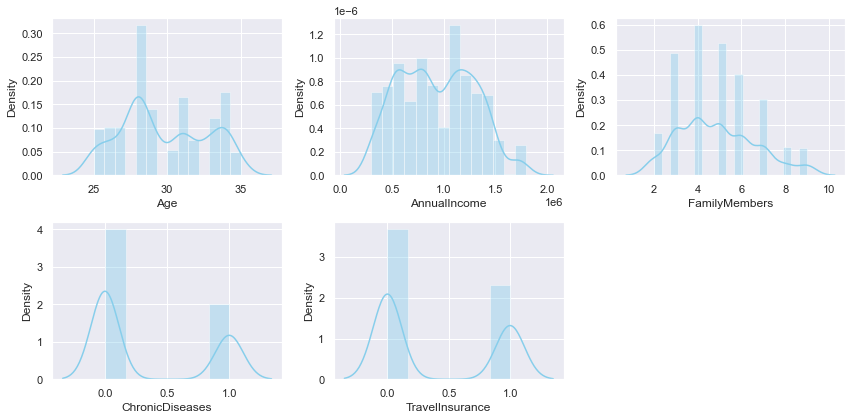

In [480]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = num_col
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

Observasi:

1. Abaikan penafsiran feature columns dengan limited discrete values seperti `Age` dan `FamilyMembers`
2. The true continuous numeric features: `AnnualIncome` agak symmetric (tidak perlu transform ke approximate normal distribution)
3. Pada target variable, `ChronicDiseases` dan `TravelInsurance` = 0 lebih sering muncul pada dataset. Tetapi, the imbalance condition tidak parah (masih OK)

### Bivariate Analysis

In [481]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


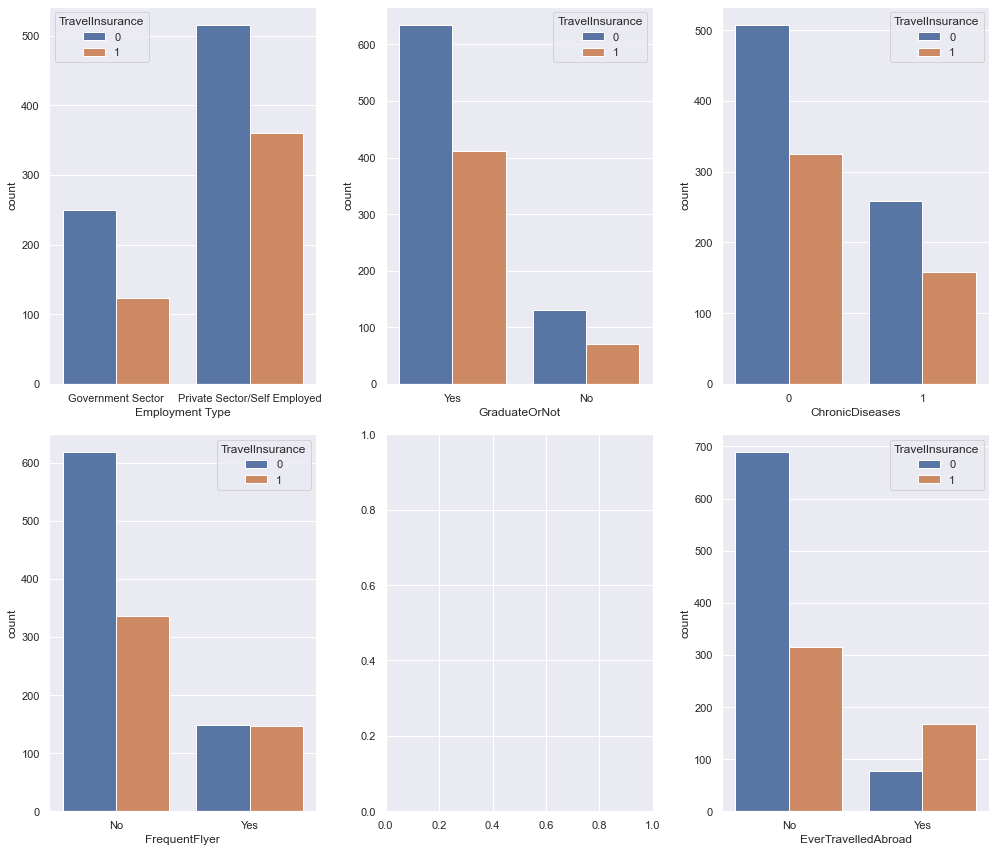

In [482]:
fig, ax = plt.subplots(2, 3, figsize=(14, 12))
sns.countplot(data=df, x='Employment Type', hue='TravelInsurance', ax=ax[0][0])
sns.countplot(data=df, x='GraduateOrNot', hue='TravelInsurance', ax=ax[0][1])
sns.countplot(data=df, x='ChronicDiseases', hue='TravelInsurance', ax=ax[0][2])
sns.countplot(data=df, x='FrequentFlyer', hue='TravelInsurance', ax=ax[1][0])
sns.countplot(data=df, x='EverTravelledAbroad', hue='TravelInsurance', ax=ax[1][2])
plt.tight_layout()
plt.show()

Observasi :

1. Pelanggan Private Sector/Self Employed dan Government Sector lebih banyak yang tidak membeli travel insurance
2. Pelanggan graduate dari perguruan tinggi lebih banyak yang tidak membeli travel insurance, begitu juga dengan pelanggan yang tidak graduate.
3. Pelanggan yang tidak memiliki Chronic Diseases lebih banyak yang tidak membeli travel insurance, begitu juga dengan pelanggan yang memiliki Chronic Diseases
4. Pelanggan yang tidak pernah membeli plane tickets tidak membeli travel insurance daripada yang membeli travel insurance, tetapi pelanggan yang pernah membeli plane tickets hampir 50:50 membeli dan tidak membeli travel insurance
5. Pelanggan yang tidak pernah traveled abroad tidak membeli travel insurance. Sebaliknya, pelanggan yang pernah traveled abroad membeli travel insurance

<AxesSubplot:>

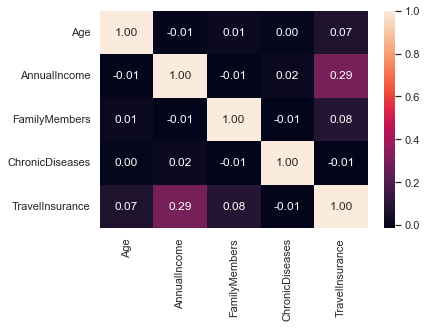

In [483]:
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

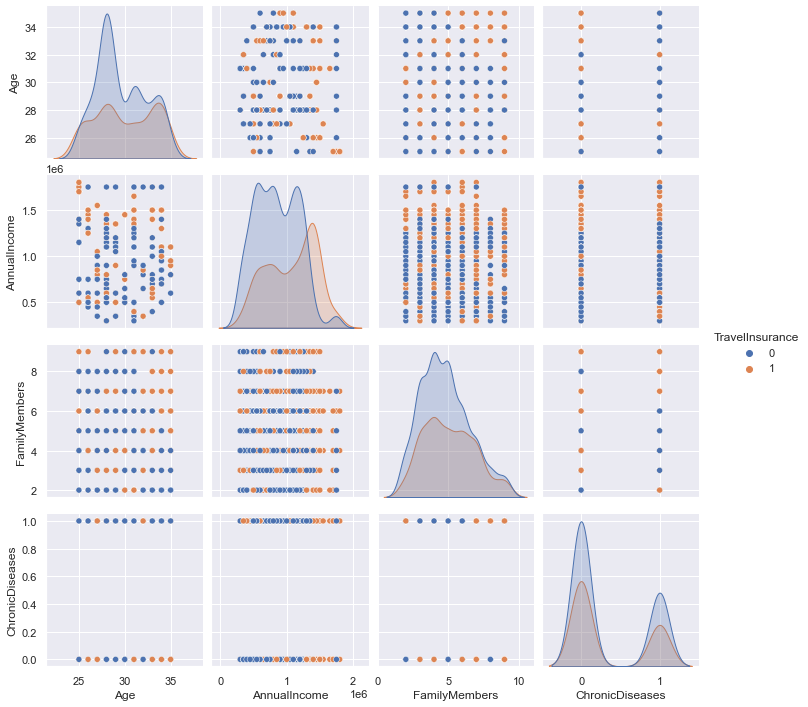

In [484]:
sns.pairplot(df, hue='TravelInsurance')

### EDA Conclusion 

1. Data tidak mengandung masalah besar. Hanya ada beberapa nilai baris duplikat yang telah ditangani
2. Secara keseluruhan, nilai minimum dan maksimum masuk akal untuk setiap kolom
3. ChronicDiseases dan TravelInsurance adalah kolom boolean/biner karena nilainya 0 atau 1, tidak perlu disimpulkan simetrinya. Karena ini dapat menjadi variabel target untuk pemodelan, nanti akan diperiksa balance-level
4. Mean ~ 50% (Median) pada kolom Age, AnnualIncome, dan FamilyMembers, menunjukan symmetrical distribution
5. Dari boxplot tidak ada outlier
6. The true continuous numeric features: AnnualIncome agak symmetric (tidak perlu transform ke approximate normal distribution)
7. Pada target variable, ChronicDiseases dan TravelInsurance = 0 lebih sering muncul pada dataset. Tetapi, the imbalance condition tidak parah (masih OK)
8. Pelanggan Private Sector/Self Employed dan Government Sector lebih banyak yang tidak membeli travel insurance
9. Pelanggan graduate dari perguruan tinggi lebih banyak yang tidak membeli travel insurance, begitu juga dengan pelanggan yang tidak graduate
10. Pelanggan yang tidak memiliki Chronic Diseases lebih banyak yang tidak membeli travel insurance, begitu juga dengan pelanggan yang memiliki Chronic Diseases
11. Pelanggan yang tidak pernah membeli plane tickets tidak membeli travel insurance daripada yang membeli travel insurance, tetapi pelanggan yang pernah membeli plane tickets hampir 50:50 membeli dan tidak membeli travel insurance
12. Pelanggan yang tidak pernah traveled abroad tidak membeli travel insurance. Sebaliknya, pelanggan yang pernah traveled abroad membeli travel insurance

### EDA Questions

1. Apa type of employment yang memiliki total annual income paling banyak?
2. Usia berapa rentan terkena penyakit kronis?
3. Siapa yang membeli travel insurance paling banyak, graduate atau bukan?

In [485]:
#Type of employment yang memiliki total annual income paling banyak

EmploymentType_cust = (df
                       .groupby(['Employment Type']) 
                       .agg(TotalAnnualIncome=('AnnualIncome','sum'))
                       .reset_index()
                       .sort_values('TotalAnnualIncome',ascending=False)
                       .head(5)
                      )
EmploymentType_cust

,Employment Type,TotalAnnualIncome
1,Private Sector/Self Employed,867850000
0,Government Sector,299400000


(array([0, 1]),
 [Text(0, 0, 'Private Sector/Self Employed'), Text(1, 0, 'Government Sector')])

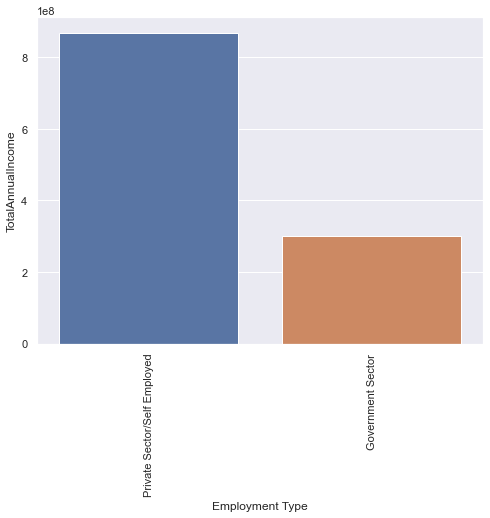

In [486]:
# visualize it
plt.figure(figsize=(8,6))
EmploymentType_cust['Employment Type'] = EmploymentType_cust['Employment Type'].astype(str)
sns.barplot(data=EmploymentType_cust, x='Employment Type', y='TotalAnnualIncome')
plt.xticks(rotation=90)

In [487]:
#Usia yang rentan terkena penyakit kronis

ChronicDiseases_cust = (df
            .groupby(['Age']) 
            .agg(TotalChronicDiseases=('ChronicDiseases','sum'))
            .reset_index()
            .sort_values('TotalChronicDiseases',ascending=False)
            .head(5)
            )
ChronicDiseases_cust

,Age,TotalChronicDiseases
3,28,93
6,31,52
9,34,51
4,29,43
8,33,36


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '28'),
  Text(1, 0, '31'),
  Text(2, 0, '34'),
  Text(3, 0, '29'),
  Text(4, 0, '33')])

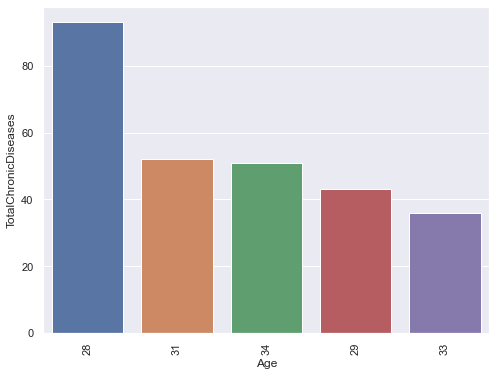

In [488]:
# visualize it
plt.figure(figsize=(8,6))
ChronicDiseases_cust['Age'] = ChronicDiseases_cust['Age'].astype(str)
sns.barplot(data=ChronicDiseases_cust, x='Age', y='TotalChronicDiseases')
plt.xticks(rotation=90)

In [489]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [491]:
#Yang membeli travel insurance paling banyak

GraduateOrNot_cust = (df
            .groupby(['GraduateOrNot']) 
            .agg(TotalGraduateOrNot=('TravelInsurance','sum'))
            .reset_index()
            .sort_values('TotalGraduateOrNot',ascending=False)
            .head(5)
            )
GraduateOrNot_cust

,GraduateOrNot,TotalGraduateOrNot
1,Yes,412
0,No,71


(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

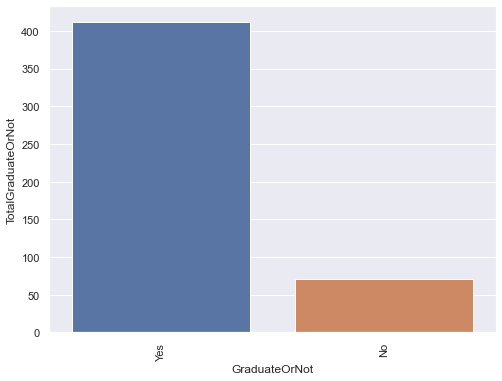

In [492]:
# visualize it
plt.figure(figsize=(8,6))
GraduateOrNot_cust['GraduateOrNot'] = GraduateOrNot_cust['GraduateOrNot'].astype(str)
sns.barplot(data=GraduateOrNot_cust, x='GraduateOrNot', y='TotalGraduateOrNot')
plt.xticks(rotation=90)